In [1]:
#library

import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

import random

In [59]:
#download mnist

mnist_train = dsets.MNIST(root = 'MNIST_data/', train = True,
                          transform = transforms.ToTensor(),
                          download = True)

mnist_test = dsets.MNIST(root = 'MNIST_data/', train = False,
                         transform = transforms.ToTensor(),
                         download = True)

In [3]:
#dataloader

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 32,
                                           shuffle = True, drop_last = True)

#왜 test를 shuffle을 true로 했었을까
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 32,
                                          shuffle = True, drop_last = True)

In [4]:
#hyperparameter

device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)

if device == 'cuda':

    torch.cuda.manual_seed_all(777)

training_epochs = 15
batch_size = 100

In [5]:
#check data
for x,y in train_loader:

    x = x.view(-1,28*28).to(device)

    print(x)
    print(y)

    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([0, 7, 9, 2, 7, 3, 4, 4, 1, 6, 8, 6, 9, 0, 1, 4, 3, 0, 7, 1, 7, 6, 2, 5,
        0, 2, 3, 7, 7, 5, 9, 8])


# simple linear layer

In [6]:
linear  = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr = 0.1)

In [8]:
28*28

784

In [9]:
#training

for epoch in range(training_epochs):

    avg_cost = 0
    total_batch = len(train_loader)

    for x,y in train_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()

        hypothesis = linear(x)

        cost = criterion(hypothesis, y)

        cost.backward()

        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
print('Learning finished')

epoch: 0001 cost =  0.414244622
Learning finished
epoch: 0002 cost =  0.313467234
Learning finished
epoch: 0003 cost =  0.296693176
Learning finished
epoch: 0004 cost =  0.287904441
Learning finished
epoch: 0005 cost =  0.281841040
Learning finished
epoch: 0006 cost =  0.277068824
Learning finished
epoch: 0007 cost =  0.274051607
Learning finished
epoch: 0008 cost =  0.270519525
Learning finished
epoch: 0009 cost =  0.269291908
Learning finished
epoch: 0010 cost =  0.267146975
Learning finished
epoch: 0011 cost =  0.265094757
Learning finished
epoch: 0012 cost =  0.263548583
Learning finished
epoch: 0013 cost =  0.262238026
Learning finished
epoch: 0014 cost =  0.261257648
Learning finished
epoch: 0015 cost =  0.259815484
Learning finished


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


accuracy: 0.8691999912261963
label: 5
prediction: 3


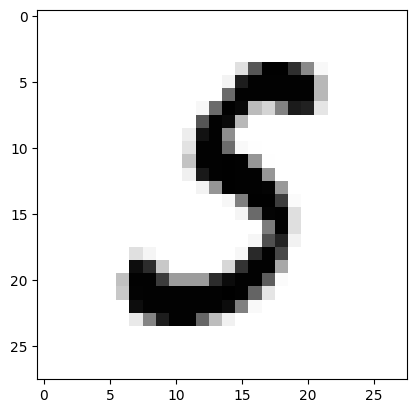

In [11]:
#test

with torch.no_grad():

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = linear(x_test)

    correct_prediction = torch.argmax(prediction,1) == y_test

    accuracy = correct_prediction.float().mean()

    print('accuracy:', accuracy.item())

    r = random.randint(0,len(mnist_test) - 1)

    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('label:',y_single_data.item())

    single_prediction = linear(x_single_data)

    print('prediction:', torch.argmax(single_prediction,1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap = 'Greys',
               interpolation = 'nearest')

    plt.show()

#initialization weight

In [60]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [67]:
learning_rate = 0.1
training_epochs = 15
batch_size = 100

In [68]:
#https://pytorch.org/docs/stable/nn.init.html
#initialization weight tensor

linear = torch.nn.Linear(784,10,bias=True).to(device)

torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[ 1.7170, -0.4611, -0.4644,  ...,  0.3602,  0.7196,  1.1789],
        [ 0.6419,  0.7655,  1.0943,  ...,  0.7149, -0.3398, -1.5012],
        [-0.1543,  0.3125, -0.7556,  ..., -0.4268, -1.3576,  1.5279],
        ...,
        [-0.9331,  1.9624, -0.2979,  ..., -1.3436,  0.0636,  1.2000],
        [-1.6933,  1.0500, -1.6246,  ..., -0.8243, -0.4997, -0.7973],
        [ 0.2238, -0.2057, -0.8574,  ..., -0.7657, -0.2953,  0.0848]],
       requires_grad=True)

In [69]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr = learning_rate)

In [70]:
total_batch = len(data_loader)

for epoch in range(training_epochs):

    avg_cost = 0

    for x,y in data_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()

        hypothesis = linear(x)

        cost = criterion(hypothesis, y)

        cost.backward()
        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch: ', '%04d' %(epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

print('learning finished')

epoch:  0001 cost =  1.096136212
epoch:  0002 cost =  1.005576730
epoch:  0003 cost =  0.999088705
epoch:  0004 cost =  1.072223544
epoch:  0005 cost =  1.018894672
epoch:  0006 cost =  1.011124969
epoch:  0007 cost =  1.013777733
epoch:  0008 cost =  1.012180567
epoch:  0009 cost =  1.022216916
epoch:  0010 cost =  1.027872682
epoch:  0011 cost =  1.039777279
epoch:  0012 cost =  1.056721330
epoch:  0013 cost =  1.044611216
epoch:  0014 cost =  1.011985064
epoch:  0015 cost =  1.035102725
learning finished


In [71]:
with torch.no_grad():

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = linear(x_test)

    correct_prediction = torch.argmax(prediction,1) == y_test

    accuracy = correct_prediction.float().mean()

    print('accuracy: ', accuracy.item())

    r = random.randint(0,len(mnist_test)-1)
    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('label:',y_single_data.item())
    single_prediction = linear(x_single_data)
    print('prediction: ', torch.argmax(single_prediction, 1).item())

accuracy:  0.7666000127792358
label: 9
prediction:  9


#3-linear & relu model

In [72]:
linear1 = torch.nn.Linear(784,256,bias=True)
linear2 = torch.nn.Linear(256,256,bias=True)
linear3 = torch.nn.Linear(256,10,bias=True)

relu = torch.nn.ReLU()

In [73]:
#initialization

torch.nn.init.kaiming_normal_(linear1.weight)
torch.nn.init.kaiming_normal_(linear2.weight)
torch.nn.init.kaiming_normal_(linear3.weight)

Parameter containing:
tensor([[-7.3265e-02, -7.9363e-02, -6.3862e-02,  ...,  3.9543e-02,
         -3.0793e-02, -7.4881e-02],
        [-1.2454e-01,  1.3825e-04,  8.3205e-02,  ...,  1.0654e-01,
         -8.0712e-02, -7.7189e-02],
        [ 4.9453e-02, -7.7921e-02, -5.2248e-02,  ...,  3.6069e-02,
          1.0350e-01, -7.3003e-02],
        ...,
        [ 1.7141e-01, -1.8280e-02,  3.7901e-02,  ..., -5.6384e-02,
         -3.3262e-02, -5.6749e-02],
        [ 9.2195e-02,  1.8266e-02, -6.5172e-02,  ..., -4.7341e-02,
          3.7289e-02, -2.2094e-02],
        [-8.6595e-02, -4.2982e-02,  5.5076e-02,  ...,  4.2883e-03,
          6.5133e-03, -9.4379e-02]], requires_grad=True)

In [74]:
model = torch.nn.Sequential(linear1, relu,
                            linear2, relu,
                            linear3).to(device)

In [75]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [76]:
#training

total_batch = len(data_loader)

for epoch in range(training_epochs):

    avg_cost = 0

    for x,y in data_loader:

        x = x.view(-1,784).to(device)
        y = y.to(device)

        optimizer.zero_grad()
        hypothesis = model(x)

        cost = criterion(hypothesis, y)

        cost.backward()

        optimizer.step()

        avg_cost += cost/total_batch

    print('epoch: ', '%04d' % (epoch + 1), 'cost = ','{:.9f}'.format(avg_cost))

print('Learning finished')

epoch:  0001 cost =  2.239399910
epoch:  0002 cost =  1.293326735
epoch:  0003 cost =  1.272700429
epoch:  0004 cost =  1.259608626
epoch:  0005 cost =  1.464928746
epoch:  0006 cost =  1.873375773
epoch:  0007 cost =  1.854643106
epoch:  0008 cost =  1.822690129
epoch:  0009 cost =  2.015369654
epoch:  0010 cost =  1.972246170
epoch:  0011 cost =  1.817596912
epoch:  0012 cost =  1.857749701
epoch:  0013 cost =  1.858996034
epoch:  0014 cost =  1.770847082
epoch:  0015 cost =  1.717664242
Learning finished


In [77]:
with torch.no_grad():

    x_test = mnist_test.test_data.view(-1,784).float().to(device)
    y_test = mnist_test.test_labels.to(device)

    prediction = model(x_test)

    correct_prediction = torch.argmax(prediction, 1) == y_test

    accuracy = correct_prediction.float().mean()

    print('accuracy:', accuracy.item())

    r = random.randint(0,len(mnist_test)-1)

    x_single_data = mnist_test.test_data[r:r+1].view(-1,784).float().to(device)
    y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('label: ', y_single_data.item())
    single_prediction = model(x_single_data)
    print('Prediction: ', torch.argmax(single_prediction,1).item())

accuracy: 0.2849999964237213
label:  3
Prediction:  5


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


# using sigmoid

In [13]:
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [16]:
linear = torch.nn.Linear(2,1,bias=True)

sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear, sigmoid).to(device)

In [17]:
#https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
#binary cross entropy loss

criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [18]:
#training

for step in range(1001):

    optimizer.zero_grad()

    hypothesis = model(x)

    cost = criterion(hypothesis, y)

    cost.backward()

    optimizer.step()

    if step % 100 == 0:

        print(step, cost.item())

0 0.8707568049430847
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996


In [19]:
#test

with torch.no_grad():

    hypothesis = model(x)

    predicted = (hypothesis > 0.5).float()

    accuracy = (predicted == y).float().mean()

    print('\nhypothesis: ', hypothesis.detach().cpu().numpy(), '\ncorrect: ',
          predicted.detach().cpu().numpy(), '\naccuracy: ', accuracy.item())


hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
accuracy:  0.5


# naive two-linear model

In [47]:
x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

#x = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]]).to(device)
#y = torch.FloatTensor([[0],[1],[1],[1]]).to(device)

In [48]:
w1 = torch.Tensor(2,2).to(device)
b1 = torch.Tensor(2).to(device)

w2 = torch.Tensor(2,1).to(device)
b2 = torch.Tensor(1).to(device)

In [49]:
def sigmoid(x):

    return 1.0/(1.0+torch.exp(-x))

#sigmoid derivative
def sigmoid_prime(x):

    return sigmoid(x) * (1 - sigmoid(x))

In [50]:
#training

for step in range(10001):

    #linear > sigmoid > linear > sigmoid

    l1 = torch.add(torch.matmul(x,w1),b1)
    a1 = sigmoid(l1)

    l2 = torch.add(torch.matmul(a1,w2),b2)
    y_pred = sigmoid(l2)

    #log cross entropy
    cost = -torch.mean(y*torch.log(y_pred) + (1-y)*torch.log(1-y_pred))

    #backpropagation
    d_y_pred = (y_pred - y)/(y_pred*(1.0-y_pred)+1e-7)

    d_l2 = d_y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1,0,1),d_b2)

    d_a1 = torch.matmul(d_b2, torch.transpose(w2,0,1))
    d_l1 = d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(x,0,1), d_b1)

    learning_rate = 0.1

    #gradient descent
    w1 = w1 - learning_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * d_w2
    b2 = b2 - learning_rate * torch.mean(d_b2, 0)

    if step % 100 == 0:

        print(step, cost.item())

0 0.6931471824645996
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

# two-linear model pytorch style

In [51]:
linear1 = torch.nn.Linear(2,2,bias = True)
linear2 = torch.nn.Linear(2,1,bias = True)

sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1,sigmoid,linear2,sigmoid).to(device)

In [52]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [53]:
#training
for step in range(10001):

    optimizer.zero_grad()
    hypothesis = model(x)

    cost = criterion(hypothesis, y)

    cost.backward()

    optimizer.step()

    if step % 100 == 0:

        print(step, cost.item())

0 0.7032610774040222
100 0.693228006362915
200 0.6931173801422119
300 0.693023145198822
400 0.6928516626358032
500 0.6924051642417908
600 0.6907261610031128
700 0.6789115071296692
800 0.6005460023880005
900 0.5141032934188843
1000 0.4456329941749573
1100 0.4059286117553711
1200 0.2657047510147095
1300 0.06546703726053238
1400 0.038825396448373795
1500 0.027686115354299545
1600 0.021515965461730957
1700 0.0175864789634943
1800 0.014863139018416405
1900 0.012864594347774982
2000 0.011335871182382107
2100 0.010129026137292385
2200 0.009152362123131752
2300 0.008345932699739933
2400 0.0076689752750098705
2500 0.007092662621289492
2600 0.006596264895051718
2700 0.006164221093058586
2800 0.005784827750176191
2900 0.005449115298688412
3000 0.0051498813554644585
3100 0.004881568718701601
3200 0.004639631602913141
3300 0.00442037358880043
3400 0.004220758564770222
3500 0.004038240294903517
3600 0.0038707535713911057
3700 0.003716558450832963
3800 0.0035740346647799015
3900 0.0034419684670865536

In [54]:
#test

with torch.no_grad():

    hypothesis = model(x)

    predicted = (hypothesis > 0.5).float()

    accuracy = (predicted == y).float().mean()

    print('\nhypothesis:', hypothesis.detach().cpu().numpy(),'\ncorrect: ',
          predicted.detach().cpu().numpy(), '\naccuracy: ', accuracy.item())


hypothesis: [[0.00123746]
 [0.9990564 ]
 [0.9990608 ]
 [0.00108296]] 
correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  1.0


#4-linear model

In [55]:
linear1 = torch.nn.Linear(2,10,bias = True)
linear2 = torch.nn.Linear(10,10,bias = True)
linear3 = torch.nn.Linear(10,10, bias = True)
linear4 = torch.nn.Linear(10,1, bias = True)

sigmoid = torch.nn.Sigmoid()

model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

In [56]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1)

In [57]:
for step in range(10001):

    optimizer.zero_grad()
    hypothesis = model(x)

    cost = criterion(hypothesis, y)

    cost.backward()
    optimizer.step()

    if step % 100 == 0:

        print(step, cost.item())

0 0.701490044593811
100 0.6931374073028564
200 0.6931344866752625
300 0.6931315660476685
400 0.6931284070014954
500 0.6931250691413879
600 0.6931213736534119
700 0.6931174993515015
800 0.6931133270263672
900 0.6931085586547852
1000 0.693103551864624
1100 0.6930978894233704
1200 0.6930914521217346
1300 0.6930843591690063
1400 0.6930761933326721
1500 0.6930669546127319
1600 0.693056046962738
1700 0.6930435299873352
1800 0.6930286288261414
1900 0.6930109262466431
2000 0.6929893493652344
2100 0.6929628252983093
2200 0.6929296255111694
2300 0.6928869485855103
2400 0.6928311586380005
2500 0.692755401134491
2600 0.6926487684249878
2700 0.6924909949302673
2800 0.6922415494918823
2900 0.6918097734451294
3000 0.69095379114151
3100 0.6888408064842224
3200 0.6809824705123901
3300 0.6099147796630859
3400 0.05874217674136162
3500 0.012058902531862259
3600 0.006094987038522959
3700 0.003961959853768349
3800 0.0028952735010534525
3900 0.0022634263150393963
4000 0.0018487435299903154
4100 0.00155703420

In [58]:
#test
with torch.no_grad():

    hypothesis = model(x)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == y).float().mean()

    print('\nhypothesis: ', hypothesis.detach().cpu().numpy(),
          '\ncorrect: ', predicted.detach().cpu().numpy(),
          '\naccuracy: ', accuracy.item())


hypothesis:  [[1.3386732e-04]
 [9.9988079e-01]
 [9.9988949e-01]
 [1.5186005e-04]] 
correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
accuracy:  1.0
